# HW 10 (15pt, Due Nov. 30)

1. Plot the function $f = x^2 - 4 x + 2$ using matplotlib for x between 0 and 4. You can see that there are two roots and one minimum. (5pt)

> (a) Find the analytical expression of the roots using sympy package.

> (b) Find the numerical expression of the root using the scipy package. (5pt)

> (c) Find the minimum point using gradient descend method.

> (d) Find the minimum point using scipy package.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

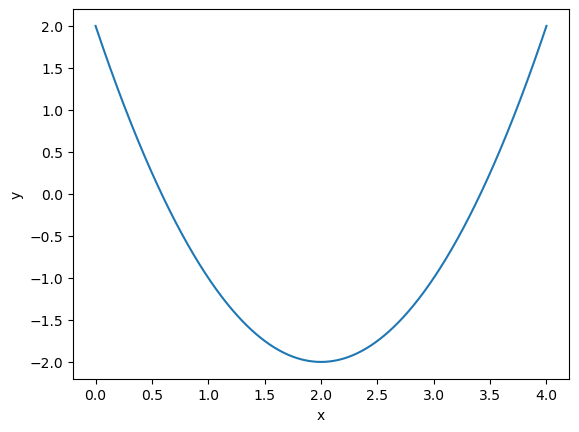

In [2]:
def function(x):
    f = (x**2-(4*x))+2
    return f

x = np.linspace(0,4,1000)
plt.plot(x,function(x))
plt.xlabel('x')
plt.ylabel('y')

In [3]:
#sympy analytical expression
import sympy

x = sympy.symbols('x') 
(x**2-(4*x))+2

sympy.solve((x**2-(4*x))+2, x)

[2 - sqrt(2), sqrt(2) + 2]

In [4]:
#numerical expression with scipy
import scipy.optimize
result = scipy.optimize.root(function,1)
result

    fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.93145113e-10])
       r: array([2.82842925])
  status: 1
 success: True
       x: array([0.58578644])

In [5]:
#numerical expression with scipy
import scipy.optimize
result = scipy.optimize.root(function,4)
result

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.9314689e-10])
       r: array([-2.82842925])
  status: 1
 success: True
       x: array([3.41421356])

In [ ]:
#minimum point with gradient descend method

def d_function(x):
    f = (2*x)-4
    return f

def gradient_descend(df, x):
    x_list=[x]
    while True:
        x_new = x - 20*df(x)
        x_list.append(x_new)
        
        if abs(x_new - x) < 1e-5:
            return x_list
        x = x_new
        
x_list = gradient_descend(d_function, 4)
print(x_list)

In [8]:
#minimum point with scipy package
import scipy.optimize
result=scipy.optimize.minimize(lambda x:(x**2-(4*x))+2,4)
result

      fun: -1.9999999999999996
 hess_inv: array([[0.5]])
      jac: array([-2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999998])

2. Plot the function cos(x) and x and on a same plot. Find the point where the two curves cross each other using Newton iteration. (5pt)
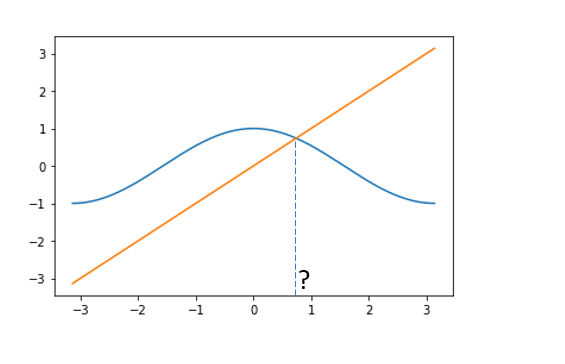

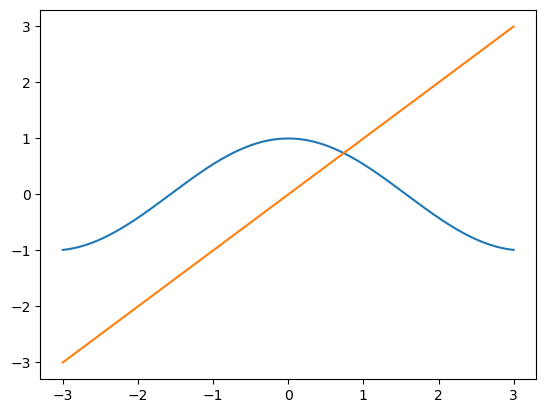

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-3, 3, 1000)
plt.plot(x, np.cos(x))
plt.plot(x, x + 0)

In [20]:
def Newton_method(f,df, x): 
    x_list=[x]
    for i_step in range(1000):
        x_new = x - f(x)/df(x)
        x_list.append(x_new)
        if abs(x_new -x )<1e-5:
            return x_list
        x = x_new
        i_step = i_step +1
    x_list.append(None)
    return x_list

x_list = Newton_method(lambda x:np.cos(x), lambda x:np.sin(x)*(-1), 1)
x_list

[1,
 1.6420926159343308,
 1.5706752771612507,
 1.5707963267954879,
 1.5707963267948966]

3. (5pt) Modify the code of cellular automaton in the lecture notes to implement rule 30. You can read about it here https://en.wikipedia.org/wiki/Rule_30


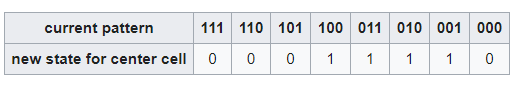

In [21]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 99.5, 99.5, -0.5)

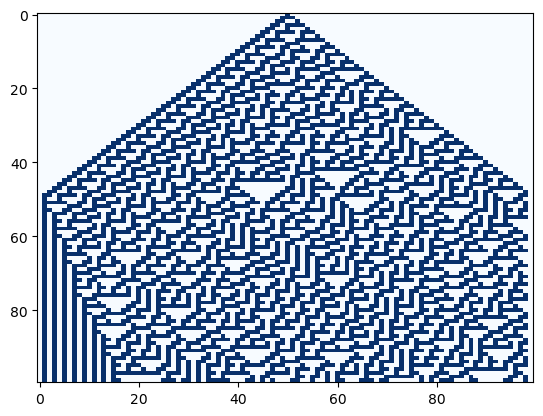

In [22]:
def rule30(init_array, num_step):
    num_cell = len(init_array)
    m = np.zeros((num_step,num_cell)) 
    m[0,:]=init_array 
    
    for i in range(1, num_step):
        for i_cell in range(1,num_cell-1): 
            if m[i-1,i_cell-1] == 1 ^ (m[i-1,i_cell] == 1 or m[i-1,i_cell+1] == 1):
                m[i,i_cell]=1
            else:
                m[i,i_cell]=0
    return m
    
init_array = np.zeros(100)
init_array[50]=1
num_step =100

m = rule30(init_array, num_step)

plt.imshow(m, cmap='Blues')
plt.axis('auto')
